In [ ]:
# Group Assignment Multivariate Econometrics Fall 2020

In [171]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [102]:
plt.style.use('/home/luuk/Documents/MNRAS_Style.mplstyle')

In [95]:
# Read in the Excel file with the data
df = pd.read_excel('./MVE_assignment_2020_dataset.xlsx')
countries = ['Netherlands','Norway']
# Select from df only those for our countries
df = df[df['cntry.name'].apply(lambda x: x in countries)]
# Drop columns that are irrelevant (ISO names of countries)
df = df.drop(['ISO_N3','ISO_C3'],axis=1)
# Set index to increase readability
df.columns = ['Country','Year','Precipitation','Radiation','Average Temp','GDP','GDP per Capita','Population','Land','CPI']
df = df.set_index(['Country','Year'])
# Replace '..' with nans to avoid problems
df = df.replace('..',np.nan)

In [96]:
# Available data:
# Mean precipitation
# Mean radiation
# Average yearly temperaure
# GDP
# GDP per capita
# Population, total
# Agricultural land
# Crop production index

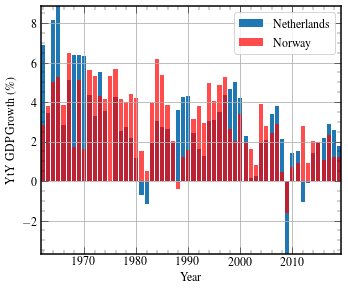

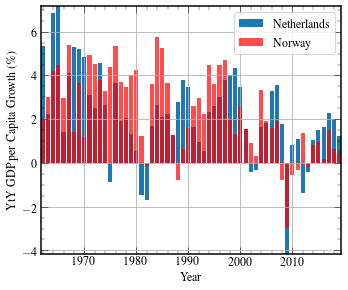

In [135]:
class simple_figures():
    def __init__(self):
        self.df = df
    
    def GPD_Growth(self):
        fig, ax = plt.subplots()
        GDP_Growth = df['GDP'].unstack().T.pct_change()*100
        ax.bar(GDP_Growth.index,GDP_Growth.Netherlands,label='Netherlands',alpha=1)
        ax.bar(GDP_Growth.index,GDP_Growth.Norway, label='Norway',alpha=0.7,color='red')

        ax.set_xlabel('Year')
        ax.set_ylabel('YtY GDP Growth (\%)')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
    def GPDpC_Growth(self):
        fig, ax = plt.subplots()
        GDP_Growth = df['GDP per Capita'].unstack().T.pct_change()*100
        ax.bar(GDP_Growth.index,GDP_Growth.Netherlands,label='Netherlands',alpha=1)
        ax.bar(GDP_Growth.index,GDP_Growth.Norway, label='Norway',alpha=0.7, color='red')

        ax.set_xlabel('Year')
        ax.set_ylabel('YtY GDP per Capita Growth (\%)')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
        
        
figs = simple_figures()
figs.GPD_Growth()
figs.GPDpC_Growth()

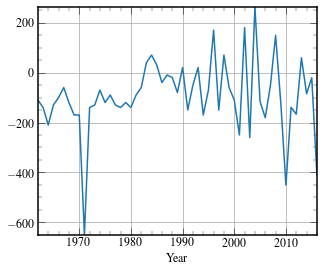

In [235]:
class preprocessing():
    def __init__(self):
        self.demean()
        self.stationary(df)
        self.detrend()
        return
        
    def demean(self):
        """Group by country and subtract mean of each column
           from the data. This will enhance the visibility of 
           outliers"""
        self.demeaned = df  - df.groupby('Country').mean()
        
    def loglevels(self):
        """Simply take the logarithm of all levels"""
        self.log = np.log(df)
        
    def stationary(self,df):
        """To detrend the data we check for each timeseries
           if it is stationary or not. This function returns 
           for each country and column the p value for the ADF
           test"""
        stationary_results = pd.DataFrame()
        for country in countries:
            subdf = df.loc[country]
            for col in subdf.columns:
                ADF_p = adfuller(subdf[col].dropna())[1]
                stationary_results.loc[country,col] = ADF_p
        self.stationary_results = stationary_results
        self.isstationary = stationary_results<0.05
        
    def detrend(self):
        """If it is not stationary we should take the difference 
           sequence. If time series is stationary, we can keep the
           original"""
        not_stationary = ['Average Temp','GDP','GDP per Capita',
                          'Population','Land','CPI']
        self.detrended = df.copy()
        for col in not_stationary:
            self.detrended[col+'_detrended'] = df[col].unstack().T.diff().T.stack()
        
        return
        
preprocessed = preprocessing()
#preprocessed.isstationary
#preprocessed.detrended['GDP_detrended'].values
preprocessed.detrended.loc['Netherlands'].Land_detrended.plot()

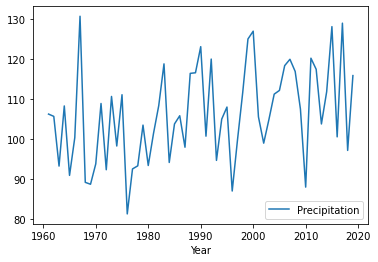

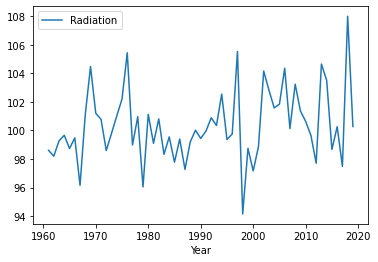

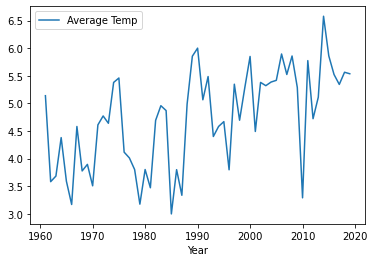

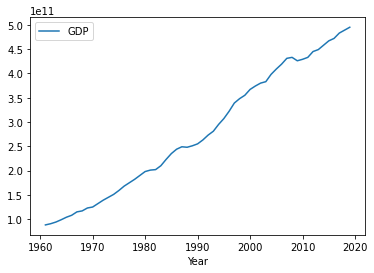

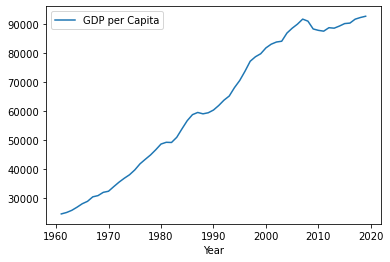

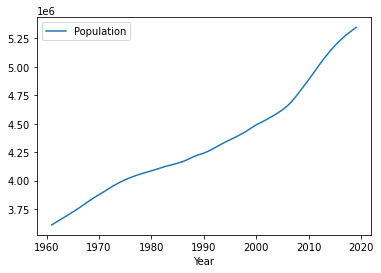

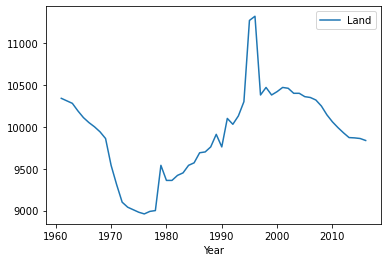

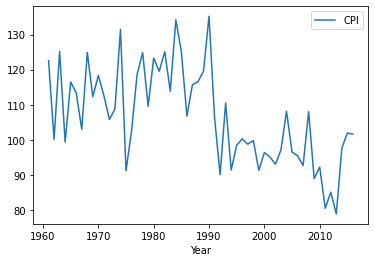

In [50]:
# Preprocessing
df.loc['Norway'].plot(x='Year',y='Precipitation')
df.loc['Norway'].plot(x='Year',y='Radiation')
df.loc['Norway'].plot(x='Year',y='Average Temp')
df.loc['Norway'].plot(x='Year',y='GDP')
df.loc['Norway'].plot(x='Year',y='GDP per Capita')
df.loc['Norway'].plot(x='Year',y='Population')
df.loc['Norway'].plot(x='Year',y='Land')
df.loc['Norway'].plot(x='Year',y='CPI')

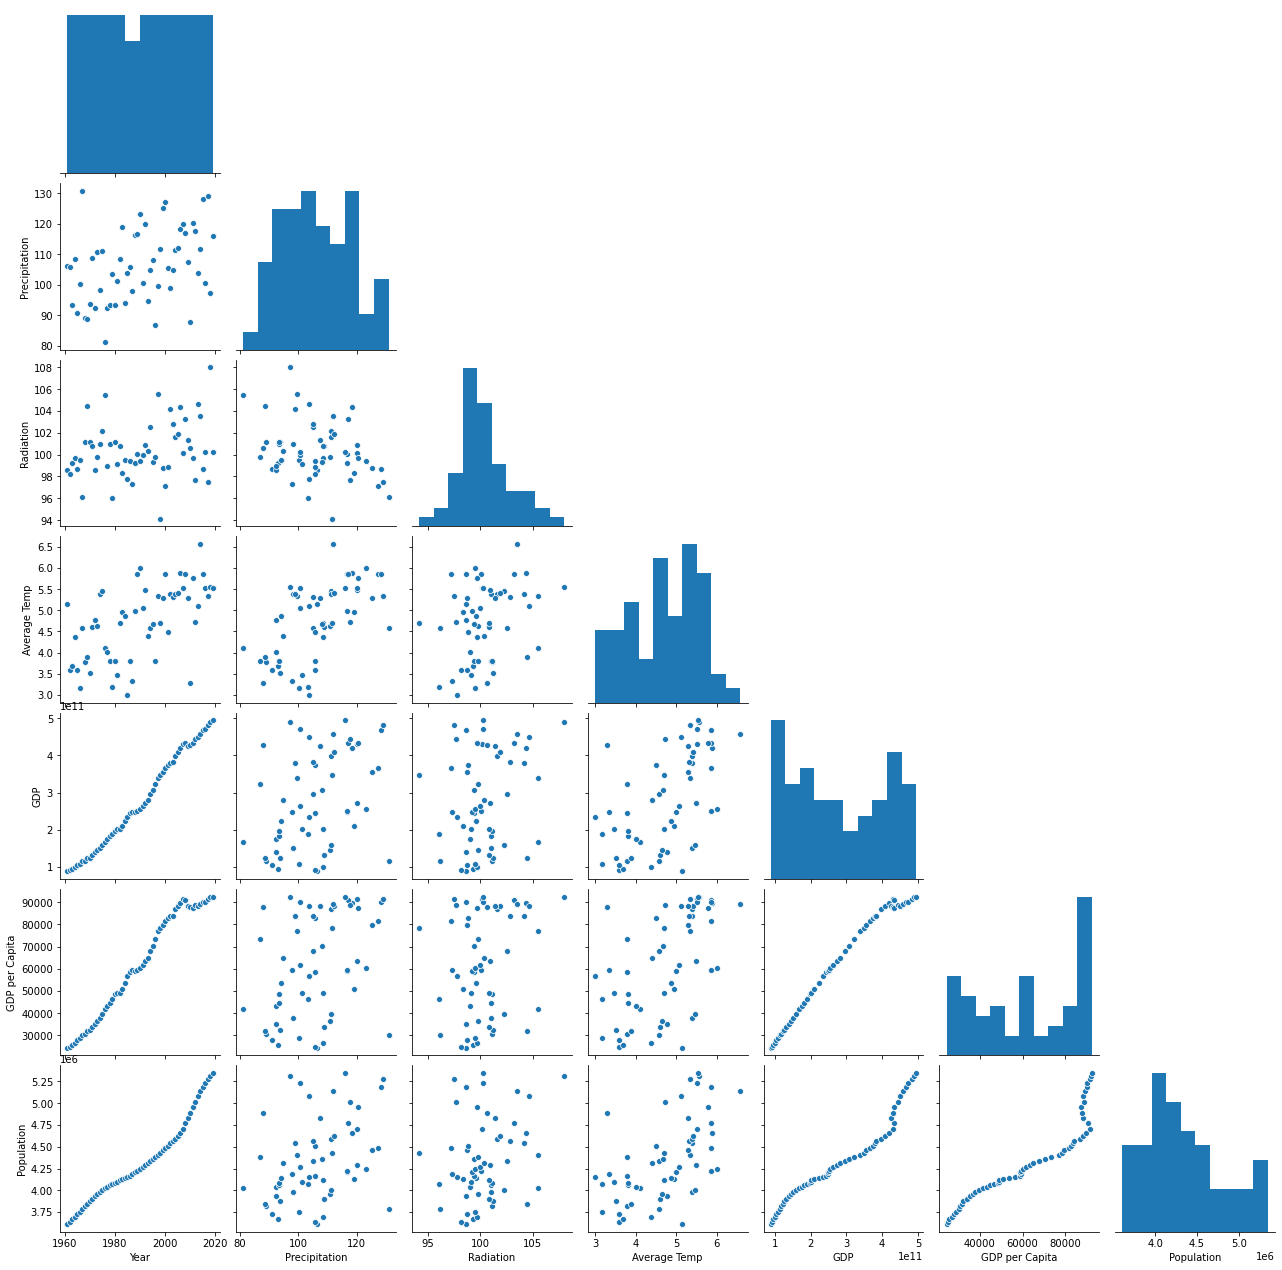

In [37]:
sns.pairplot(df.loc['Norway'].reset_index(),corner=True)
plt.show()